In [1]:
import numpy as np
%display latex
from scipy import constants, special

pi = constants.pi
hbar = 1
x, t = var('x', 't')
Psi = var('Psi')
assume(x, 'real')
assume(t, 'real')

$V(x) = \frac12 m\omega^2x^2$  

$\Psi_n(x,t) = \psi_n(x)\phi_n(t)$

$\xi = \sqrt{\frac{m\omega}{\hbar}}x$

$\psi_n(\xi) = (\frac{m\omega}{2\hbar})^{\frac{1}{4}}\frac{1}{\sqrt{2^nn!}}H_n(\xi)e^{-\frac{\xi^2}{2}}$

$H_n(\xi)$ are the Hermite Polynomials

$\phi_n(x) = e^{-i\frac{E_n}{\hbar}t}$

$E_n = (n+\frac12)\hbar\omega$

In [16]:
def H(n,xi):
    H = [1, 2*xi, 4*xi^2-2, 8*xi^3-12*xi, 16*xi^4-48*xi^2+12, 32*xi^5-160*xi^3+120*xi]
    return H[n]

In [17]:
m = 1
w = 1
xi = (sqrt((m*w)/(hbar))*x)

n_max = 3
E_max = (n_max+0.5)*hbar*w
colors = ['black', 'red', 'blue', 'green']
x_range = (-sqrt(2*1.3*E_max/(m*w^2)),sqrt(2*1.3*E_max/(m*w^2)))

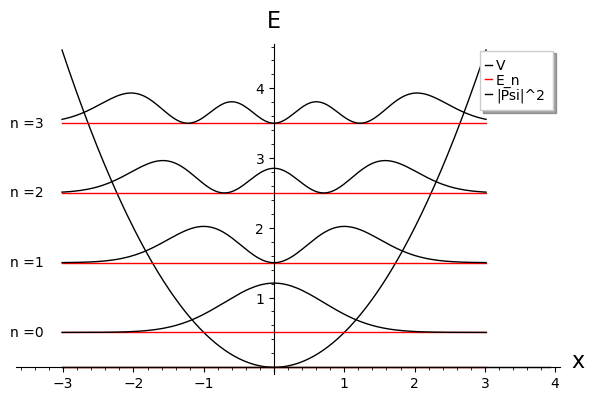

In [34]:
S = plot(0.5*m*w^2*x^2, x_range, color = colors[0], legend_label='V') + plot(0, x_range, legend_label = 'E_n', color = colors[1]) +plot(0, (x_range[0], 1.3*x_range[1]), legend_label = '|Psi|^2', color = colors[0])


for n in range(n_max+1):
    S += text("n =" + str(n), (x_range[0]-0.5,(n+0.5)*hbar*w), color = colors[0])

for n in range(n_max+1):
    E = (n+0.5)*hbar*w
    psi = (m*w/(2*hbar))^(1/4)*1/(sqrt(2^n*gamma(n+1)))*H(n,xi)*e^(-0.5*xi^2)
    phi = e^(-I*E*t/hbar)
    
    eqPsi = abs(Psi) == sqrt(psi*phi*psi*phi.conjugate())
    
    S += plot(E, x_range, color = colors[1]) + plot(eqPsi.rhs()^2+E, x_range, color = 'black', axes_labels=['x','E'])
    
show(S)

Animation with 126 frames
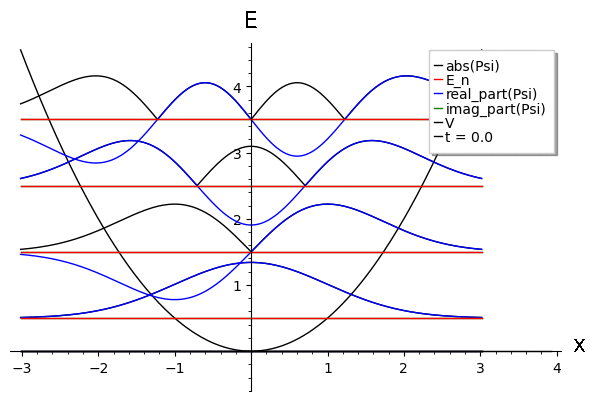

In [31]:
eqPsi = abs(Psi) == 0
eqRe = Psi.real() == 0
P = animate([plot(0, x_range, legend_label = eqPsi.lhs(), color = colors[0]) + plot(0, x_range, legend_label = 'E_n', color = colors[1]) + plot(0, x_range, color = colors[2], legend_label = eqRe.lhs()) + plot(0, x_range, color = colors[3], legend_label = Psi.imag()) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
for i in range(len(P)):
    P[i].set_legend_options(loc=1)

P += animate([plot(0.5*m*w^2*x^2, x_range, color = colors[0], legend_label = 'V') + plot(0, (x_range[0], 1.3*x_range[1]), legend_label = 't = ' + str(round(t_val,2)), color = 'black',axes_labels=['x','E']) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)] )

PsiArr = []
ReArr = []
ImArr = []

for n in range(n_max+1):
    E = (n+0.5)*hbar*w
    psi = (m*w/(2*hbar))^(1/4)*1/(sqrt(2^n*gamma(n+1)))*H(n,xi)*e^(-0.5*xi^2)
    phi = e^(-I*E*t/hbar)
    
    eqPsi = abs(Psi) == sqrt(psi*phi*psi*phi.conjugate())
    eqRe = Psi.real() == psi*phi.real()
    eqIm = Psi.imag() == psi*phi.imag()
    
    PsiArr.append(animate([plot(eqPsi.rhs()(t=t_val)+E, x_range, ymin = 0.5*hbar*w-1, color = colors[0]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)]))
    ReArr.append(animate([plot(eqRe.rhs()(t=t_val)+E, x_range, color = colors[2]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)]))
    ImArr.append(animate([plot(eqIm.rhs()(t=t_val)+E, x_range, color = colors[3]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)]))
    
    P += PsiArr[n] + ReArr[n] + ImArr[n]
    P += animate([plot(E, x_range, color = colors[1]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
P.show(delay=4)

$\Psi(x,t) = \sum\limits_{n=0}^\infty c_n\Psi_n(x,t)$

In this case I approximate the solution by taking the sum not up to infinity but up to a number $N$ and let $c_n=c=\frac{1}{\sqrt{N+1}}$.  
Calculating the expected value for the Energy:  
$\langle \hat{H}\rangle = \sum\limits_{n=1}^N|c_n|^2E_n=\sum\limits_{n=0}^N\frac{1}{N+1}\cdot(n+\frac12)\hbar\omega=\frac{\hbar\omega}{2}(N+1)$

Animation with 126 frames
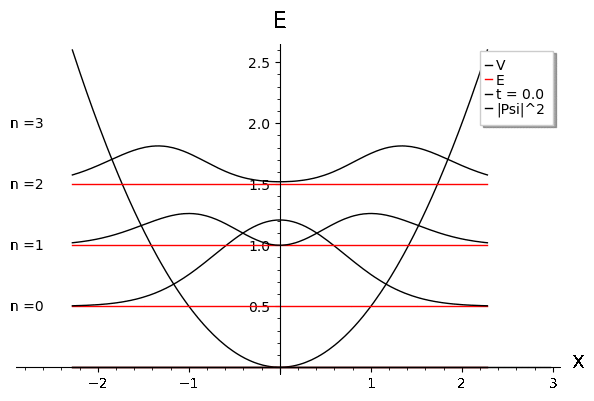

Animation with 126 frames
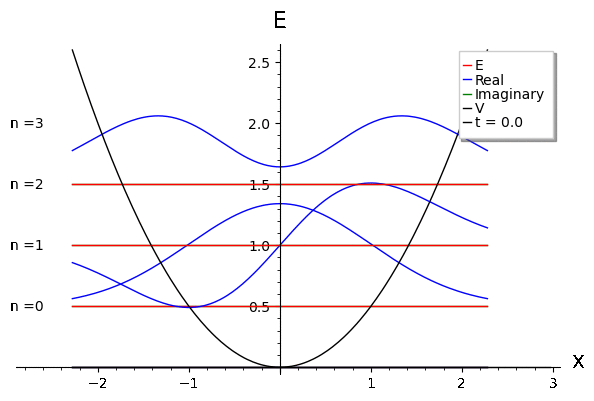

In [36]:
def lincomb(N, m, w):
    E_max = (N+1)*w*hbar/2
    E = [0]
    c = [0]
    
    x_range = (-sqrt(2*1.3*E_max/(m*w^2)),sqrt(2*1.3*E_max/(m*w^2)))
    
    eqRe = Psi.real() == 0
    eqIm = Psi.imag() == 0
    eqPro = Psi == 0
    eqCon = Psi.conjugate() == 0
    
    colors = ['black', 'red', 'blue', 'green']
    
    
    S = animate([plot(0.5*m*w^2*x^2 ,x_range, color = colors[0], legend_label = 'V') for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
       
    P = animate([plot(0, x_range, legend_label = 'E', color = colors[1]) + plot(0, x_range, color = colors[2], legend_label = 'Real') + plot(0, x_range, color = colors[3], legend_label = 'Imaginary') for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
    for i in range(len(P)):
        P[i].set_legend_options(loc=1)
        S[i].set_legend_options(loc=1)
        
       
    Re = [0]
    Im = [0]
    Pro = [0]
    Con = [0]
    #SArr = [None]
    #PArr = [None]
    for n in range(N+1):
        #defining energy and wavefunction for current n
        En = (n+1/2)*hbar*w
        E.append((n+1)*hbar*w/2)
        c.append(1/sqrt(n+1))
        psi = (m*w/(2*hbar))^(1/4)*1/(sqrt(2^n*gamma(n+1)))*H(n,sqrt((m*w)/(hbar))*x)*e^(-0.5*(sqrt((m*w)/(hbar))*x)^2)
        phi = e^(-I*En*t/hbar)
        
        #adding the wavefunction to the corresponding array
        Re.append(Re[n-1] + psi*phi.real())
        Im.append(Im[n-1] + psi*phi.imag())
        Pro.append(Pro[n-1] + psi*phi)
        Con.append(Con[n-1] + psi*phi.conjugate())
        # adding the wave function to the eqution (old version)
        #eqRe = eqRe.lhs() == eqRe.rhs()+c*psi*phi.real()
        #eqIm = eqIm.lhs() == eqIm.rhs()+c*psi*phi.imag()
        #eqPro = eqPro.lhs() == eqPro.rhs()+c*psi*phi
        #eqCon = eqCon.lhs() == eqCon.rhs()+c*psi*phi.conjugate()
        
    for n in range(1, N+1):
        P += animate([plot(c[n]*Re[n](t=t_val)+E[n], x_range, color = colors[2]) + plot(c[n]*Im[n](t=t_val)+E[n], x_range, color = colors[3]) + plot(E[n], x_range, color = colors[1]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)] )
        S += animate([plot(E[n], x_range, color = colors[1]) + plot((c[n]*Pro[n]*c[n]*Con[n]).real()(t=t_val)+E[n], x_range, color = 'black') for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
            
    #markers on y axis
    for n in range(n_max+1):
        S += animate([text("n =" + str(n), (x_range[0]-0.5,(n+1)*hbar*w/2), color = colors[0]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
        P += animate([text("n =" + str(n), (x_range[0]-0.5,(n+1)*hbar*w/2), color = colors[0]) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
    
    S += animate([plot(0, x_range, color = colors[1], legend_label = 'E') + plot(0, (x_range[0],1.3*x_range[1]), color = 'black', legend_label = 't = ' + str(round(t_val,2))) + plot(0, x_range, legend_label = '|Psi|^2', color = 'black',axes_labels=['x','E']) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)])
    P += animate([plot(0.5*m*w^2*x^2, x_range, color = colors[0], legend_label = 'V') + plot(0, (x_range[0],1.3*x_range[1]), legend_label = 't = ' + str(round(t_val,2)), color = 'black',axes_labels=['x','E']) for t_val in sxrange(0,(hbar)/(0.5*hbar*w)*2*pi, .1)] )
    
    
    #eqAbs = eqPro*eqCon
    #S += animate([plot(E, (0,a), color = colors[1]) + plot(eqAbs.rhs().real()(t=t_val)+E, (0,a), color = 'black') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    #P += animate([plot(eqRe.rhs()(t=t_val)+E, (x, 0, a), color = colors[2]) + plot(eqIm.rhs()(t=t_val)+E, (x,0,a), color = colors[3]) + plot(E, (0,a), color = colors[1]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
    return S, P
(lincomb(3, 1, 1)[0]).show(delay = 4)
(lincomb(3, 1, 1)[1]).show(delay = 4)